In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
days = pd.read_csv('data/day.csv')
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hours = pd.read_csv('data/hour.csv')
hours.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 1) Univariate Analysis

The following are some univariate visualizations for the relevant variables. Note that we excluded the following variables since we can infer the distributions solely based on the design: `'instant'`, `'dteday'`, `'season'`, `'yr'`, `'mnth'`, `'hr'`, `'weekday'`, `'workingday'`. We decided to focus on the `'cnt'` variable as the response variable and since `'cnt'` = `'casual'` + `'registered'`, we will omit these two variables from our analysis. 

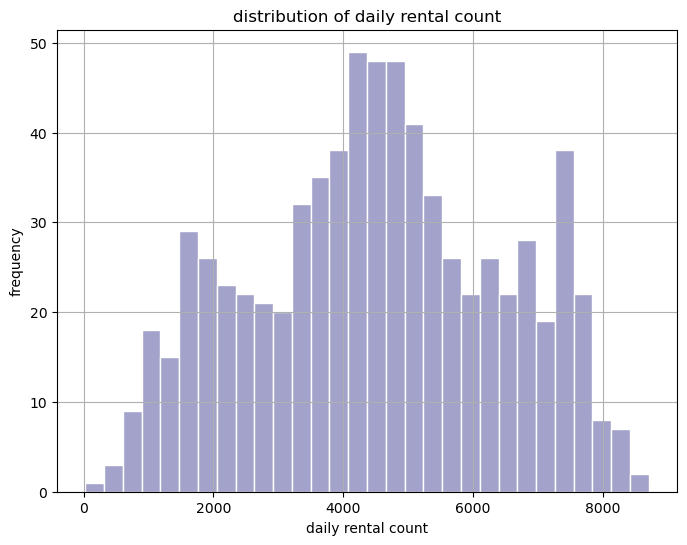

In [4]:
fig = plt.figure(figsize=(8, 6))
plt.grid()
plt.hist(days['cnt'], color='#a2a2ca', bins=30, edgecolor='w')
plt.title("distribution of daily rental count")
plt.xlabel("daily rental count")
plt.ylabel("frequency")
plt.show()

The response variable `'cnt'` is roughly normally distributed, raging from 22 to 8714 total rentals per day. After exploring the data further, we found that there are 76 days out of 731 days that have incomplete hourly information, which resulted in very small daily rental counts. We plan to drop the days with less than 22 hours of data (8 days) for our analysis.

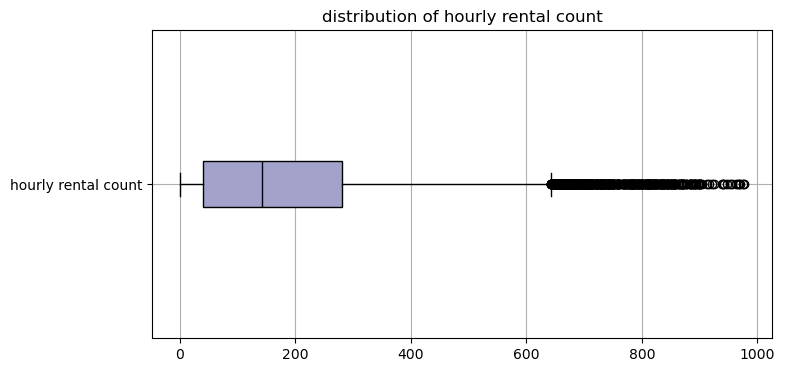

In [5]:
fig = plt.figure(figsize=(8, 4))
bplot = plt.boxplot(hours['cnt'], 
                    vert = False,
                    patch_artist=True,
                    medianprops=dict(color='black'),
                    tick_labels=['hourly rental count']
                   )
bplot['boxes'][0].set_facecolor('#a2a2ca')
plt.title("distribution of hourly rental count")
plt.grid()

By the IQR method for outlier detection, there seems to be many outliers for the hourly rental count.

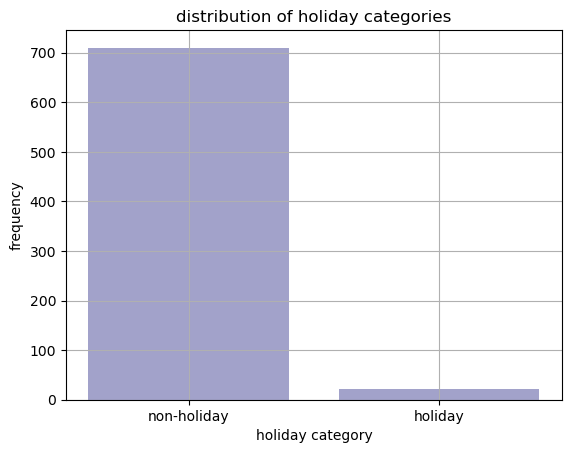

In [6]:
holi = days['holiday'].astype(str).replace({'0': 'non-holiday', '1': 'holiday'}).value_counts()
plt.bar(holi.index, 
        height = holi.values,
        color = '#a2a2ca'
       )
plt.title('distribution of holiday categories')
plt.xlabel('holiday category')
plt.ylabel('frequency')
plt.grid()
plt.show()

As expected, there are many more non-holidays than holidays in the daily data. We believe this variable may not be usweful for the purpose of predicting bikeshare counts.

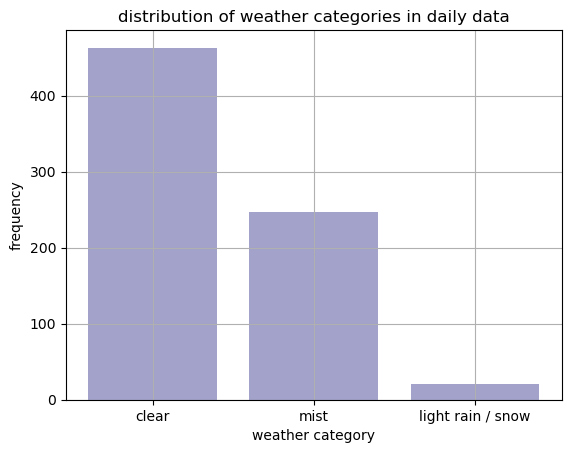

In [7]:
weather_days = days['weathersit'].value_counts()
weather_days.index = ['clear', 'mist', 'light rain / snow']

plt.bar(weather_days.index, 
        height = weather_days.values,
        color = '#a2a2ca'
       )
plt.title('distribution of weather categories in daily data')
plt.xlabel('weather category')
plt.ylabel('frequency')
plt.grid()
plt.show()

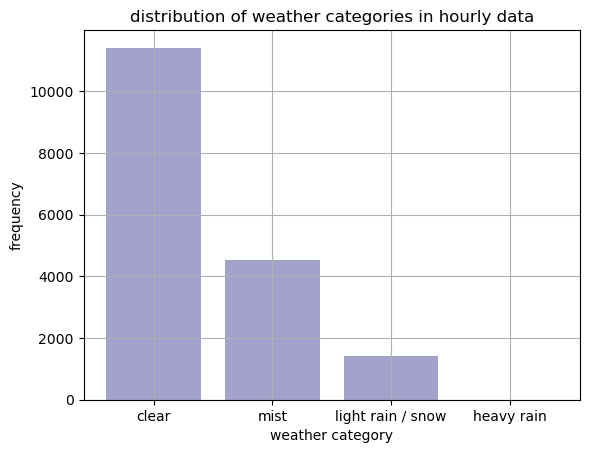

In [8]:
weather_hrs = hours['weathersit'].value_counts()
weather_hrs.index = ['clear', 'mist', 'light rain / snow', 'heavy rain']

plt.bar(weather_hrs.index, 
        height = weather_hrs.values,
        color = '#a2a2ca'
       )
plt.title('distribution of weather categories in hourly data')
plt.xlabel('weather category')
plt.ylabel('frequency')
plt.grid()
plt.show()

In [9]:
weather_hrs

clear                11413
mist                  4544
light rain / snow     1419
heavy rain               3
Name: count, dtype: int64

The above two plots show the distribution of the `'weathersit'` column (weather category) in both the daily and hourly data. It is not very visible but the hourly data contains 3 instances of heavy rain, while the daily data contains none. Most days are clear, with some mist days, and few light rain/snow days.

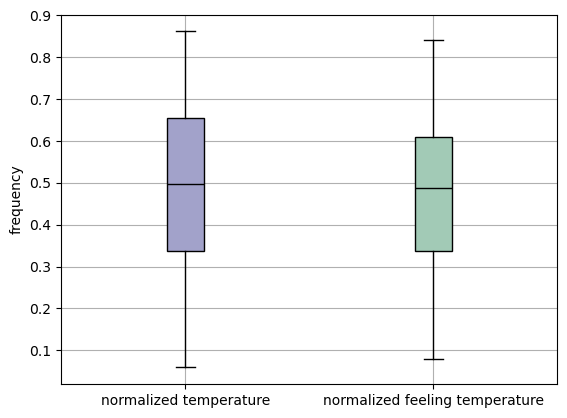

In [10]:
labels = ['normalized temperature', 'normalized feeling temperature']
colors = ['#a2a2ca', '#a2cab6']

fig, ax = plt.subplots()
ax.set_ylabel('frequency')

bplot = ax.boxplot(days[['temp', 'atemp']],
                   patch_artist=True,
                   tick_labels=labels,
                   medianprops=dict(color='black')
                  ) 

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    
plt.grid()
plt.show()

The distributions of actual temperature and feeling temperature seem to be similar. We believe feeling temperature is more relevant to our analysis of bikeshare counts so we will be using feeling temperature moving forward.

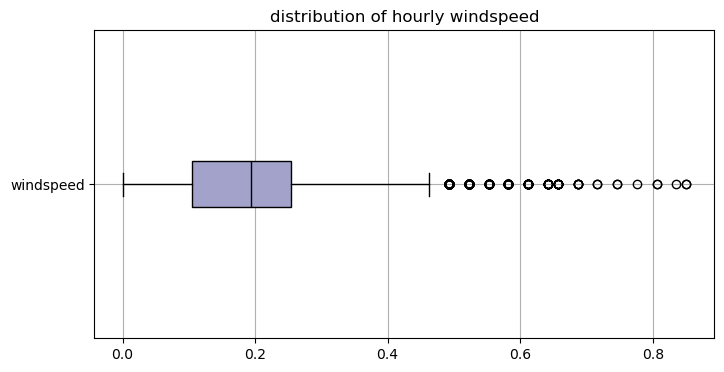

In [11]:
fig = plt.figure(figsize=(8, 4))
bplot = plt.boxplot(hours['windspeed'], 
                    vert=False,
                    patch_artist=True, 
                    medianprops=dict(color='black'),
                    tick_labels=['windspeed']
                   )
bplot['boxes'][0].set_facecolor('#a2a2ca')
plt.title("distribution of hourly windspeed")
plt.grid()

We believe the `'windspeed'` variable may be influential to the rental counts since people are less likely to rent a bike when the wind is very strong. There seems to be some outliers in the `'windspeed'` column in the hourly data. 

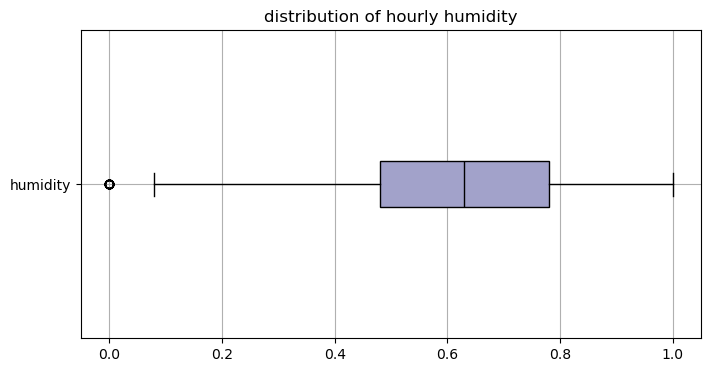

In [12]:
fig = plt.figure(figsize=(8, 4))
bplot = plt.boxplot(hours['hum'], 
                    vert=False,
                    patch_artist=True, 
                    medianprops=dict(color='black'),
                    tick_labels=['humidity']
                   )
bplot['boxes'][0].set_facecolor('#a2a2ca')
plt.title("distribution of hourly humidity")
plt.grid()

We believe the `'hum'` variable may be influential to the rental counts since it may be correlated with the weather (rain = higher humidity) and people may be less likely to rent a bike when the humidity is high. There seems to be an outlier in the `'hum'` column in the hourly data corresponding to a humidity value of 0. We believe this is an error since a humidity of 0% is very unlikely in nature, especially in Washington D.C. 

## 2) Research Question

**Prediction Problem**

Using the hourly data, can we accurately predict the total number of bike rentals for each hour based on weather and temporal information.
- response variable: `'cnt'` (count of total rental bikes)
- predictor variables:
    - `'mnth'` (month of the year)
    - `'workingday'` (the day is neither weekend nor holiday: 1, otherwise: 0)
    - `'weathersit'` (clear: 1, mist/cloudy: 2, light rain/snow: 3, heavy rain/snow: 4)
    - `'atemp'` (normalized feeling temperature in Celsius)
    - `'hum'` (normalized humidity)
    - `'windspeed'` (normalized wind speed)

**Inference Problem**

Using the daily data, is there a significant trend in the proportion of casual bike renters out of the total renters based on whether the day is a holiday or not? In other words, we wish to conduct a permutation test to see whether there is significant difference in the distribution of the proportion of casual renters between holidays and non-holidays.

- Null hypothesis: there is no difference in the distribution of the proportion of casual renters between holidays and non-holidays.
- Alternative hypothesis: there is a significant difference in the distribution of the proportion of casual renters between holidays and non-holidays.

## 3) Bivariate Analysis

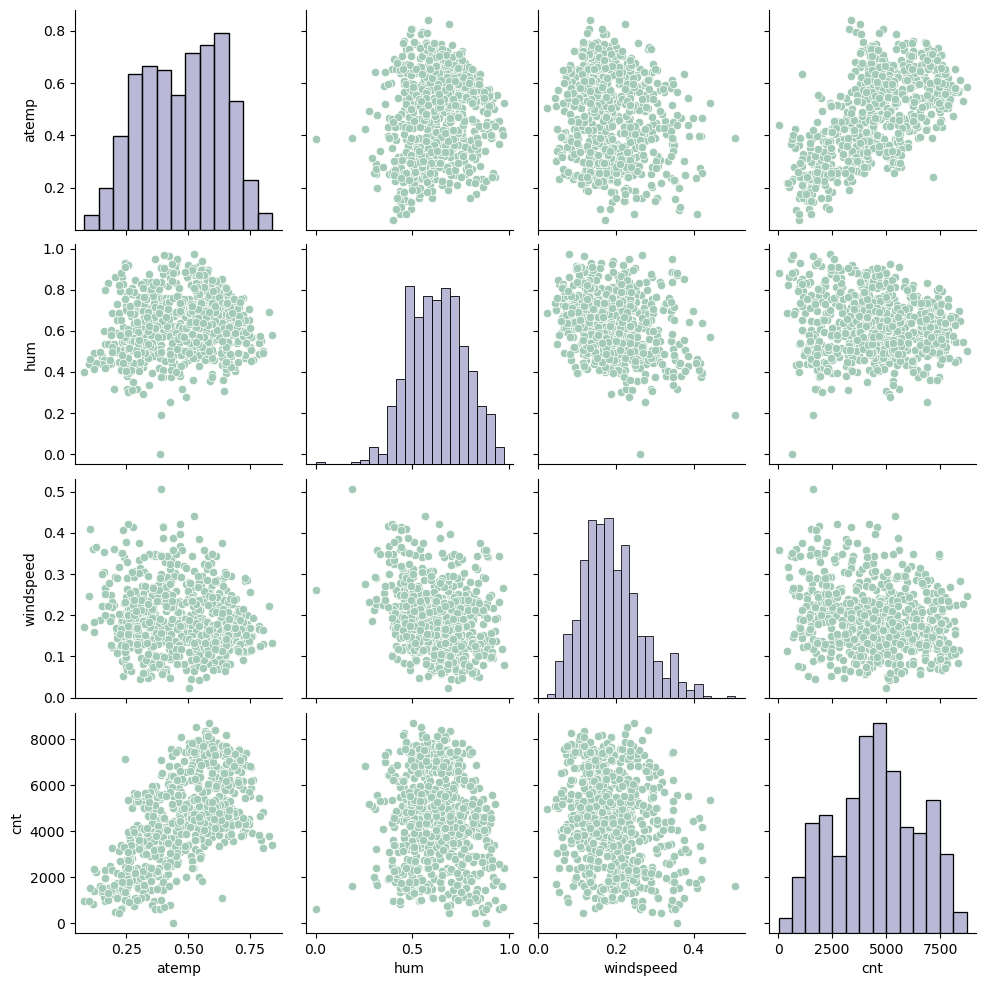

In [13]:
cont = ['atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(days[cont],
             diag_kws={'color':'#a2a2ca'},
             plot_kws={'color':'#a2cab6'}
            );

For the continuous variables: `'cnt'`, `'atemp'`, `'hum'`, `'windspeed'`, `'cnt'` and `'atemp'` show roughly normal distributions, whereas, `'hum'` is slightly left-skewed and `'windspeed'` is right-skewed. Out of all the predictor-response pairs, only `'atemp'` and `'cnt'` seem to have a strong linear relationship, while `'hum'` and `'windspeed'` do not. None of the predictor-predictor pairs have any noticable linear relationships, which confirms that there is no high correlatinos between any two predictors in the data. There are a couple outliers visible in the `'hum'` and `'windspeed'` (as supported by the skew), which explains the few outliers we see in those scatter plots.

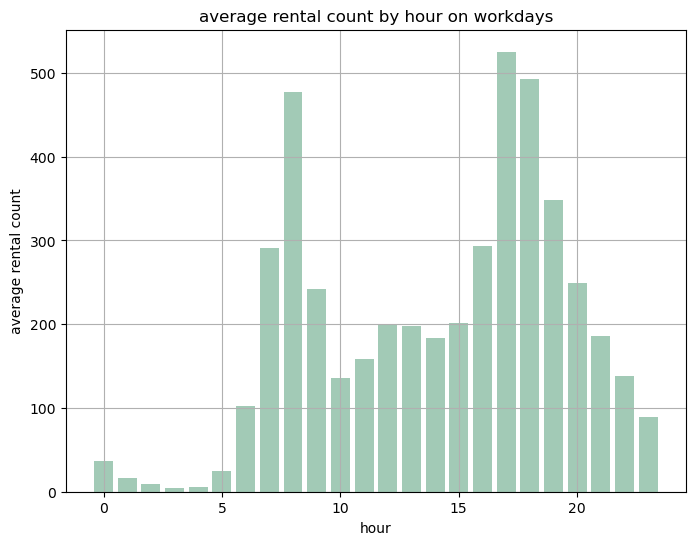

In [14]:
avg_hr = hours[hours['workingday'] == 1].groupby('hr')[['cnt']].mean()
fig = plt.figure(figsize=(8, 6))
plt.grid()
plt.bar(x = avg_hr.index, height = avg_hr['cnt'], color='#a2cab6')
plt.title("average rental count by hour on workdays")
plt.xlabel("hour")
plt.ylabel("average rental count")
plt.show()

The bar plot shows the rental counts throughout the day for only workdays. The trend seems to reflect the typical travel patterns of people with a 9-5 work schedule, with peaks at 7-8 AM and 5-6 PM. 

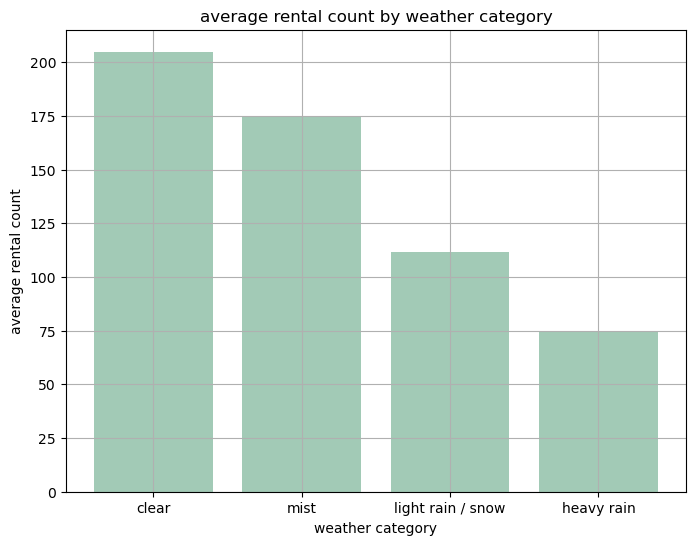

In [15]:
weather = hours.groupby('weathersit')[['cnt']].mean()
weather.index = ['clear', 'mist', 'light rain / snow', 'heavy rain']
fig = plt.figure(figsize=(8, 6))
plt.grid()
plt.bar(x = weather.index, height = weather['cnt'], color='#a2cab6')
plt.title("average rental count by weather category")
plt.xlabel("weather category")
plt.ylabel("average rental count")
plt.show()

The trend shown above matches our expectation of how weather influences the likelihood of a person renting a bike. On clear days, people are more likely to go out and bike and as the weather get more uncomfortable, people are less likely to rent bikes. 

In [16]:
hours.groupby('dteday').filter(lambda x: x.shape[0] >= 22).to_csv("data/hours_clean.csv")